<a href="https://colab.research.google.com/github/sandhrabijoy/_/blob/master/Weather_Prediction_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [26]:
#loading the data
from zipfile import ZipFile
data="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path=keras.utils.get_file(origin=data,fname="jena_climate_2009_2016.csv.zip")
zipfile=ZipFile(zip_path)
zipfile.extractall()
csv="jena_climate_2009_2016.csv"

df=pd.read_csv(csv)

In [27]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


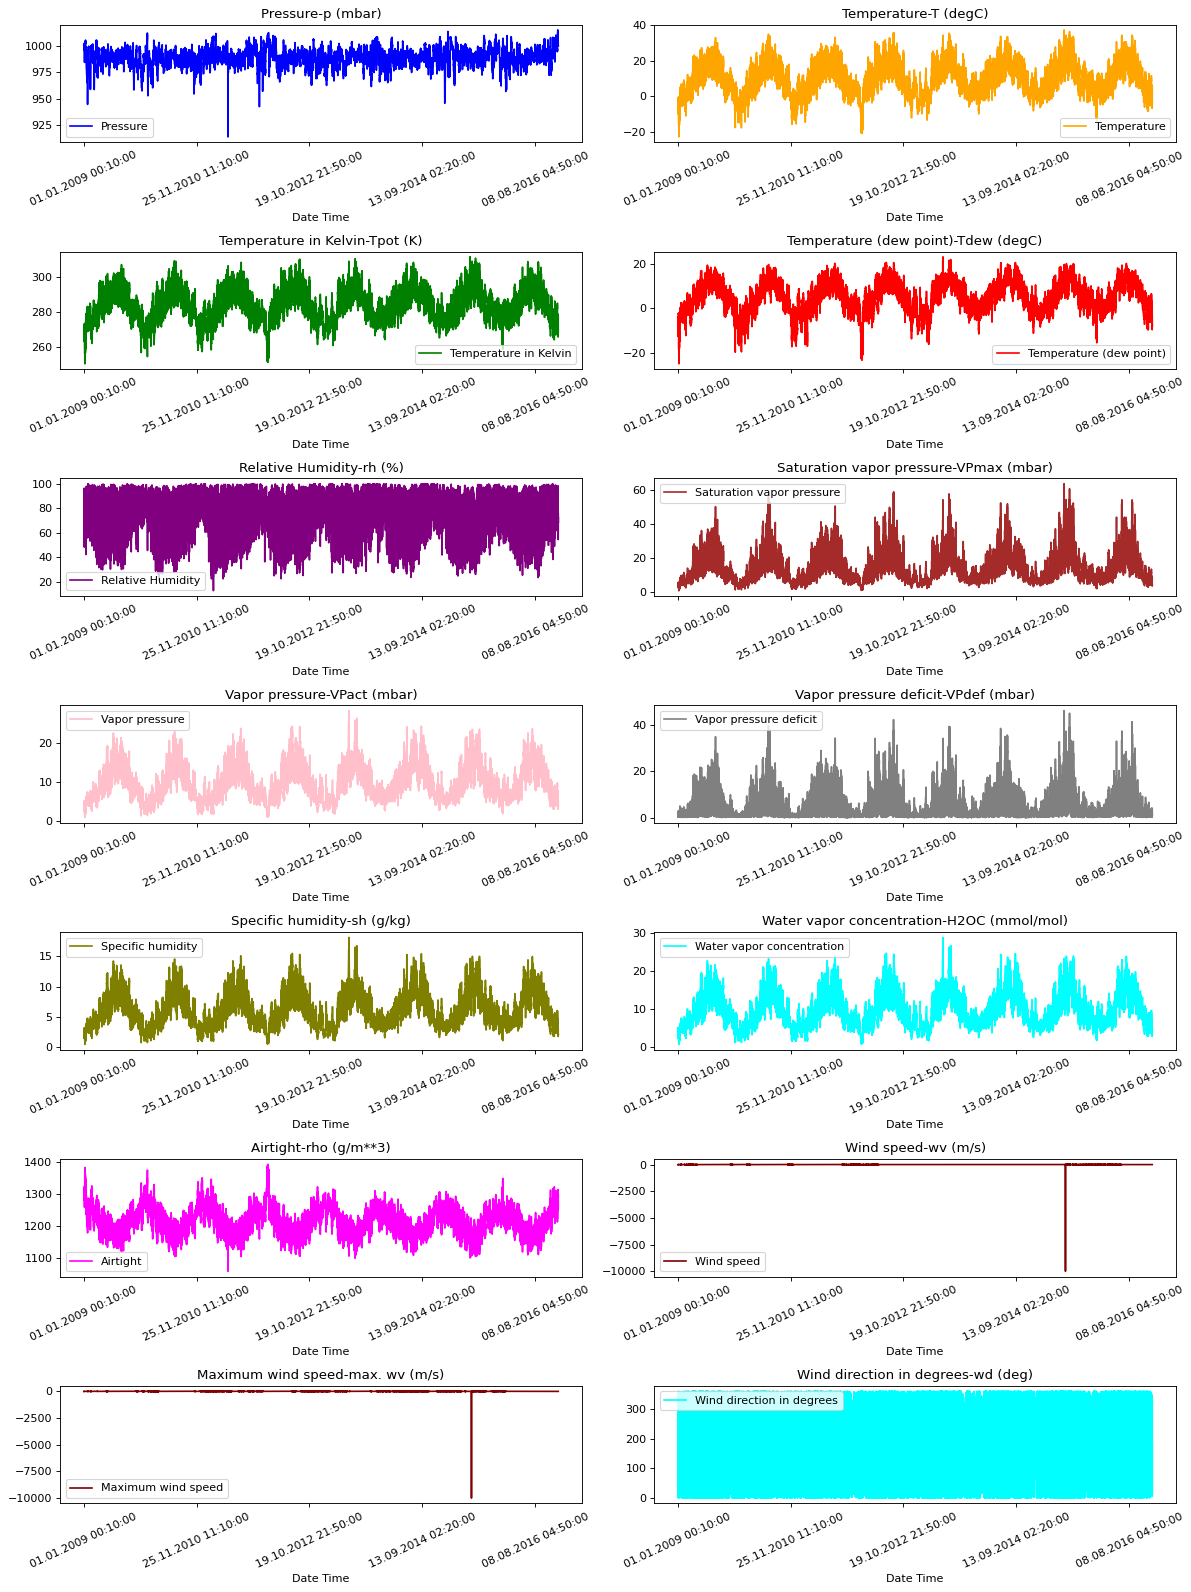

In [28]:
#data visualization
import matplotlib.pyplot as plt
import pandas as pd

titles=["Pressure", "Temperature", "Temperature in Kelvin", "Temperature (dew point)",
    "Relative Humidity", "Saturation vapor pressure", "Vapor pressure",
    "Vapor pressure deficit", "Specific humidity", "Water vapor concentration",
    "Airtight", "Wind speed", "Maximum wind speed", "Wind direction in degrees"]

feature_keys=["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)",
    "VPmax (mbar)", "VPact (mbar)", "VPdef (mbar)", "sh (g/kg)",
    "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)",]

colors = [
    "blue", "orange", "green", "red", "purple",
    "brown", "pink", "gray", "olive", "cyan", "magenta","maroon","maroon", "cyan"
]

date_time_key='Date Time'

def plot_single_feature(ax,title,key,color,time_data,data):
  t_data=data[key]
  t_data.index=time_data
  t_data.plot(ax=ax,color=color, title="{}-{}".format(title,key),rot=25)
  ax.legend([title])

def show_raw_visualization(data):
  time_data=data[date_time_key]
  fig,axes=plt.subplots(nrows=7,ncols=2,figsize=(15,20),dpi=80,facecolor='w',edgecolor='k')
  for i,(title,key,color) in enumerate(zip(titles,feature_keys,colors)):
    plot_single_feature(axes[i//2,i%2],title,key,color,time_data,data)
    plt.tight_layout()

show_raw_visualization(df)

In [29]:
 #data preprocessing
import numpy as np

split_fraction=0.715
train_split=int(split_fraction*len(df))
step=6

past=720
future=72
learning_rate=0.001
batch_size=256
epochs=10

def normalize_data(data,train_split):
  data_mean=np.mean(data[:train_split],axis=0)
  data_std=np.std(data[:train_split],axis=0)
  normalized_data=(data-data_mean)/data_std
  return normalized_data

In [30]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32


In [31]:
features=normalize_data(features.values,train_split)
features=pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944


In [32]:
train_data=features.loc[0:train_split-1]
val_data=features.loc[train_split:]

In [33]:
#train the dataset
start=past+future
end=start+train_split

x_train=train_data.iloc[start:end,:7].values
y_train=train_data.iloc[start:end,1].values.reshape(-1,1)

sequence_length=int(past/step)

print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("Sequence length:",sequence_length)

x_train shape: (299901, 7)
y_train shape: (299901, 1)
Sequence length: 120


In [34]:
dataset_train=keras.preprocessing.timeseries_dataset_from_array(x_train,y_train,sequence_length=sequence_length,sampling_rate=step,batch_size=batch_size)

In [35]:
x_end=len(val_data)-past-future

label_start=train_split+past+future

x_val=val_data.iloc[:x_end][[i for i in range(7)]].values
y_val=features.iloc[label_start:][[1]]

dataset_val=keras.preprocessing.timeseries_dataset_from_array(x_val,y_val,sequence_length=sequence_length,sampling_rate=step,batch_size=batch_size)

for batch in dataset_train.take(1):
  inputs,targets=batch

print("Input shape:",inputs.numpy().shape)
print("Target shape:",targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [36]:
#training
inputs=keras.layers.Input(shape=(inputs.shape[1],inputs.shape[2]))
lstm_out=keras.layers.LSTM(32)(inputs)
outputs=keras.layers.Dense(1)(lstm_out)
model=keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss="mse")
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 120, 7)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
path_checkpoint="model_checkpoint.weights.h5"
es_callback=EarlyStopping(monitor="val_loss",min_delta=0,patience=7)

modelckpt_callback=ModelCheckpoint(monitor="val_loss",filepath=path_checkpoint,
                                   verbose=1,save_weights_only=True,save_best_only=True)

history=model.fit(dataset_train,epochs=epochs,validation_data=dataset_val,callbacks=[es_callback])

Epoch 1/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 182s 155ms/step - loss: 0.4316 - val_loss: 0.3708
Epoch 2/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 197s 150ms/step - loss: 0.3675 - val_loss: 0.3764
Epoch 3/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 174s 149ms/step - loss: 0.3611 - val_loss: 0.3701
Epoch 4/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 173s 148ms/step - loss: 0.3546 - val_loss: 0.4341
Epoch 5/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 172s 147ms/step - loss: 0.3063 - val_loss: 0.4261
Epoch 6/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 175s 149ms/step - loss: 0.3004 - val_loss: 0.4732
Epoch 7/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 176s 151ms/step - loss: 0.2825 - val_loss: 0.4973
Epoch 8/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 175s 150ms/step - loss: 0.2588 - val_loss: 0.4887
Epoch 9/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 173s 147ms/step - loss: 0.2576 - val_loss: 0.4995
Epoch 10/10
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 203s 149ms/step - loss: 0.2565 - val_loss: 0.4917


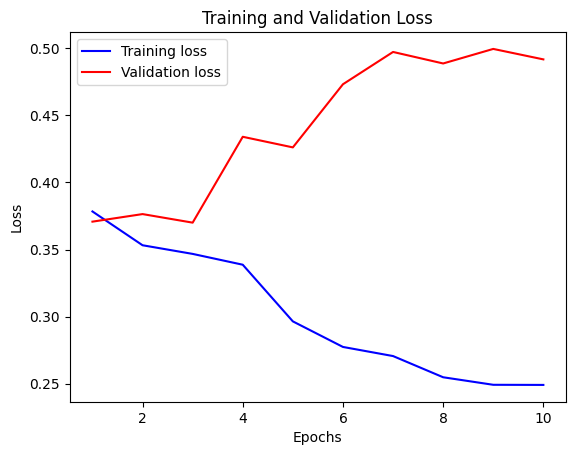

In [42]:
#evaluate the model
import matplotlib.pyplot as plt
def visualize_loss(history,title):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  epochs=range(1,len(loss)+1)
  plt.plot(epochs,loss,"b",label="Training loss")
  plt.plot(epochs,val_loss,"r",label="Validation loss")
  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
visualize_loss(history,"Training and Validation Loss")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


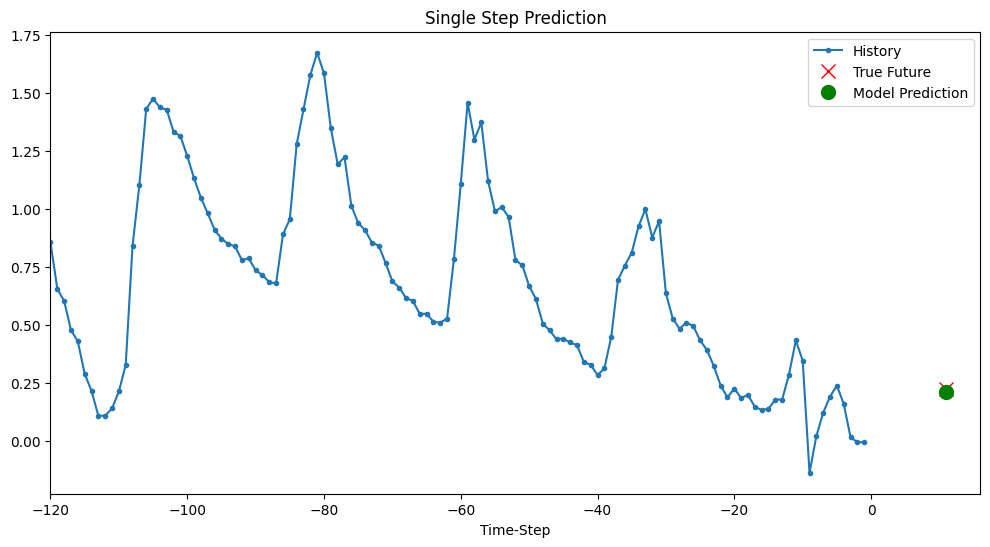

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


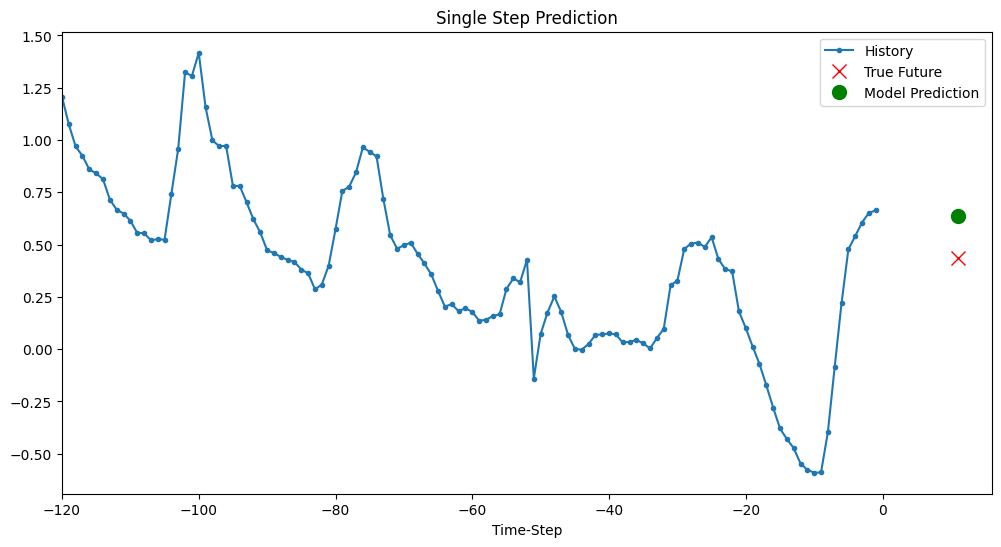

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


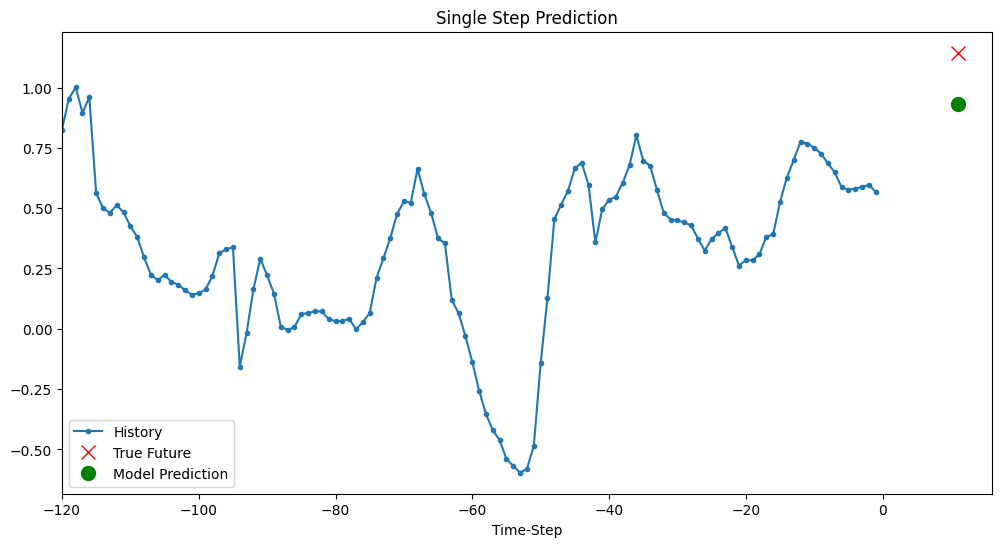

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


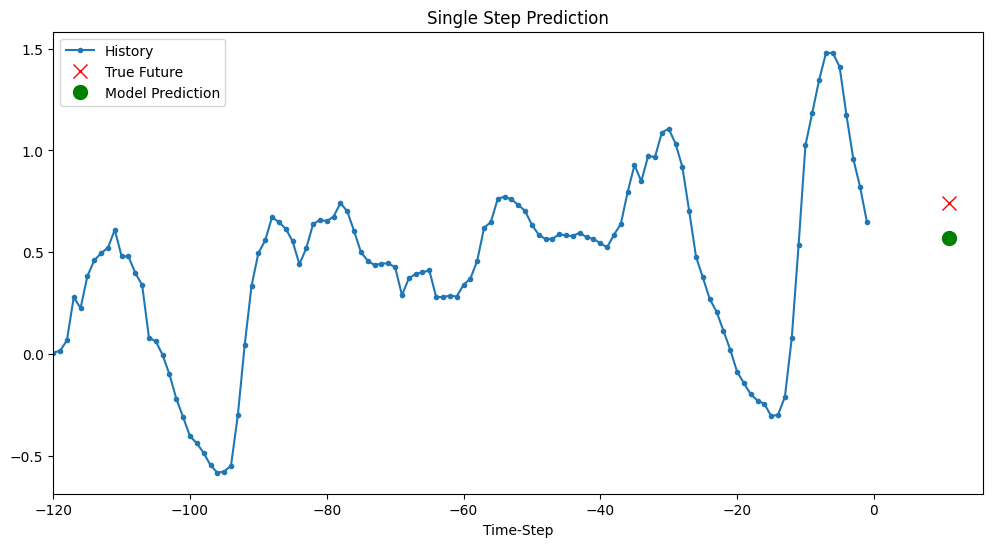

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


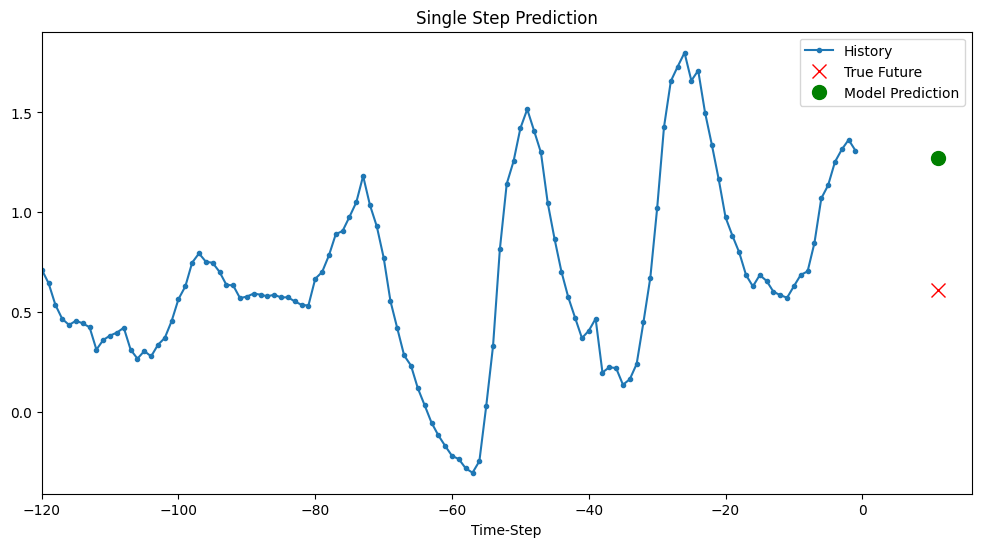

In [45]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))

    if delta:
        future = delta
    else:
        future = 0

    plt.figure(figsize=(12, 6))
    plt.title(title)

    for i, val in enumerate(plot_data):
        if i:
            plt.plot(time_steps[-1] + future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])

    plt.legend()
    plt.xlim([time_steps[0], time_steps[-1] + future + 5])
    plt.xlabel("Time-Step")
    plt.show()

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

